### 📝 Project Problem Statement

In the era of digital image processing and artificial intelligence, classifying flowers based on images has become a widely explored domain in computer vision. However, accurately identifying flower species from real-world photographs remains a challenging task due to variations in lighting, background, angle, and flower structure.

The problem this project addresses is:

"How can we accurately classify flower images into their respective categories using deep learning and image processing techniques?"

This classification problem requires developing a robust model that can distinguish between five flower types — roses, daisies, dandelions, sunflowers, and tulips — using a labeled dataset of flower images.

### ✅ Solution Statement

To solve this image classification problem, a Convolutional Neural Network (CNN)-based deep learning pipeline is implemented using TensorFlow and Keras. The approach includes:

Loading the flower dataset from a public TensorFlow-hosted URL.

Preprocessing the dataset:

Reading and resizing images using OpenCV.

Labeling images numerically based on their category.

Normalizing the image data for efficient learning.

Splitting the data into training and testing sets.

Augmenting image data to reduce overfitting.

Building a CNN model using layers like Conv2D, MaxPooling2D, Flatten, Dense, and Dropout.

Training the model with appropriate loss function and optimizer.

Evaluating the model using classification metrics and a confusion matrix.

The trained model demonstrates the ability to classify flower images into five distinct classes with good accuracy, contributing to the field of automated botanical identification.

### All libraries Used for this project

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import PIL
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras import layers
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

### Load Flower Dataset from URL

In [7]:
data_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=keras.utils.get_file('flower_photos',origin=data_url,cache_dir='.',untar=True)

In [8]:
data_dir

'.\\datasets\\flower_photos'

### Convert Data Path into a Readable Format
- ##### Converts the string path into a Pathlib object for easier file traversal.

In [10]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

### Check All Image Files

In [11]:
list(data_dir.glob('**/*.jpg'))

[WindowsPath('datasets/flower_photos/testing/162362896_99c7d851c8_n.jpg'),
 WindowsPath('datasets/flower_photos/testing/162362897_1d21b70621_m.jpg'),
 WindowsPath('datasets/flower_photos/testing/163978992_8128b49d3e_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437754174_22ec990

#### Lists all .jpg images inside the dataset.
- Counts total number of flower images.

In [20]:
images_count=len(list(data_dir.glob('**/*.jpg')))
images_count

3673

### Accessing Images from a Category
- Retrieves all images under the "roses" folder and counts them.

In [21]:
roses=list(data_dir.glob('*/roses/*'))
len(roses)

641

### Displays a specific rose image using PIL.

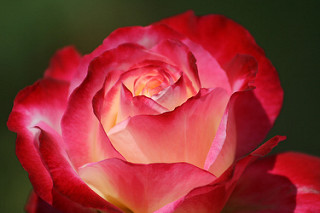

In [22]:
roses[104]
PIL.Image.open(roses[104])

### Organize Images and Labels
- Dictionary mapping flower names to their corresponding image paths.

In [23]:
flowers_images_dict = {
    'roses': list(data_dir.glob('*/roses/*')),
    'daisy': list(data_dir.glob('*/daisy/*')),
    'dandelion': list(data_dir.glob('*/dandelion/*')),
    'sunflowers': list(data_dir.glob('*/sunflowers/*')),
    'tulips': list(data_dir.glob('*/tulips/*')),
}

- Maps flower categories to integer labels for classification.

In [24]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [25]:
flowers_images_dict['roses'][200]

WindowsPath('datasets/flower_photos/flower_photos/roses/19566556880_476c66c5ee_n.jpg')

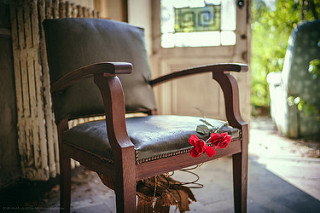

In [26]:
PIL.Image.open(flowers_images_dict['roses'][200])

In [27]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [28]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

### loads the image as a NumPy array.

In [29]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [30]:
img.shape

(240, 179, 3)

### This line resizes the image to a fixed size of 180x180 pixels using OpenCV's `resize()` function and then prints its shape.

In [31]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

### Read and Resize Images into Arrays

In [32]:
X=[]
y=[]
for flower_names,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(180,180))
        X.append(resized_image)
        y.append(flowers_labels_dict[flower_names])

### Convert lists into NumPy arrays for model compatibility.

In [33]:
X=np.array(X)
y=np.array(y)

### Train-Test Split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [35]:
X_train.shape

(2752, 180, 180, 3)

In [36]:
X_test.shape

(918, 180, 180, 3)

In [37]:
X_train[0]

array([[[ 68,  79,  77],
        [ 63,  70,  63],
        [ 60,  62,  56],
        ...,
        [ 49,  40,  37],
        [ 48,  39,  36],
        [ 48,  39,  36]],

       [[ 57,  62,  60],
        [ 61,  64,  60],
        [ 60,  61,  55],
        ...,
        [ 48,  39,  36],
        [ 48,  39,  36],
        [ 50,  41,  38]],

       [[ 61,  58,  57],
        [ 64,  64,  59],
        [ 59,  59,  53],
        ...,
        [ 49,  40,  37],
        [ 49,  40,  37],
        [ 50,  41,  38]],

       ...,

       [[ 49, 121,  93],
        [ 40,  65,  51],
        [ 52,  96,  67],
        ...,
        [156, 216, 211],
        [161, 216, 212],
        [169, 203, 206]],

       [[ 48, 119,  90],
        [ 45,  58,  44],
        [ 50,  91,  60],
        ...,
        [217, 233, 238],
        [201, 212, 215],
        [185, 168, 175]],

       [[ 54, 121,  95],
        [ 46,  58,  46],
        [ 46,  89,  60],
        ...,
        [227, 245, 248],
        [219, 201, 204],
        [108,  81,  83]]

### Normalize the Data

In [38]:
X_train=X_train/255
X_test=X_test/255

### CNN Model – Without Data Augmentation

In [39]:
num_classes=5
model_cnn=Sequential([
    Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(num_classes,activation='sigmoid')
])

### Compile the model using adam optimizer and sparse categorical cross-entropy.

In [40]:
model_cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Train the model for 15 epochs.

In [41]:
model_cnn.fit(X_train,y_train,epochs=15)

Epoch 1/15


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 205ms/step - accuracy: 0.3594 - loss: 1.6257
Epoch 2/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 205ms/step - accuracy: 0.6027 - loss: 1.0099
Epoch 3/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.6960 - loss: 0.8418
Epoch 4/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.7455 - loss: 0.6473
Epoch 5/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 208ms/step - accuracy: 0.8316 - loss: 0.4489
Epoch 6/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 200ms/step - accuracy: 0.9264 - loss: 0.2370
Epoch 7/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.9665 - loss: 0.1350
Epoch 8/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.9883 - loss: 0.0570
Epoch 9/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.9845 - loss: 0.0608
Epoch 10/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.9905 - loss: 0.0367
Epoch 11/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.9940 - loss: 0.0204
Epoch 12/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/ste

### Evaluate model on test data.

In [42]:
model_cnn.evaluate(X_test,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6346 - loss: 2.1439


[2.164398670196533, 0.6361655592918396]

### Predictions

In [43]:
predicions = model_cnn.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


In [44]:
predicions[:4]

array([[8.46744537e-01, 9.99997497e-01, 9.99865353e-01, 1.25684593e-11,
        1.03410045e-02],
       [9.99781787e-01, 3.08136165e-01, 3.91561516e-05, 3.56816046e-04,
        9.78730619e-01],
       [7.28042364e-01, 3.03660236e-05, 9.99999344e-01, 6.08647359e-04,
        1.38516380e-02],
       [9.99214530e-01, 1.98366225e-01, 1.08808326e-03, 2.04553315e-03,
        9.88451719e-01]], dtype=float32)

#### Softmax
- Applies the softmax function to convert those raw logits into probabilities for each class.
- The result is a vector of values between 0 and 1 that sum to 1, representing the model's confidence for each class.

In [45]:
tf.nn.softmax(predicions[7])

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.20505391, 0.26058933, 0.1992232 , 0.12691966, 0.20821393],
      dtype=float32)>

In [46]:
score=tf.nn.softmax(predicions[7])

#### np.argmax()
- returns the index of the maximum value, i.e., the class with the highest predicted probability.

In [47]:
np.argmax(score)

1

In [48]:
scores=tf.nn.softmax(predicions)

In [49]:
y_predicted_new=[np.argmax(score) for score in scores]

In [50]:
y_predicted_new[:4]

[1, 0, 2, 0]

In [51]:
y_test[:4]

array([1, 0, 2, 4])

### We calculate the confusion matrix to evaluate how well the classification model performed:

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm=confusion_matrix(y_test,y_predicted_new)

In [54]:
import seaborn as sns

### This block visualizes the confusion matrix as a heatmap using `seaborn`.

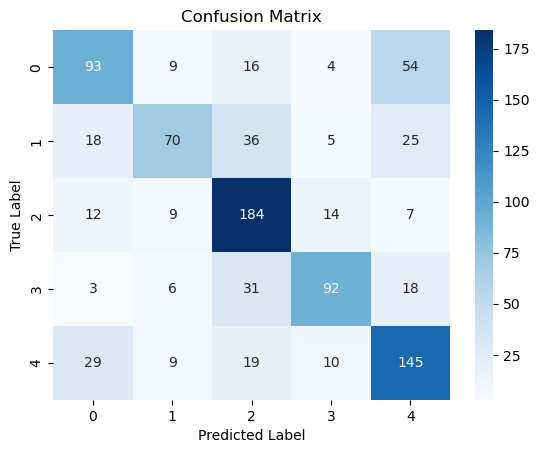

In [55]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')   # What the model predicted
plt.ylabel('True Label')        # The actual correct label
plt.title('Confusion Matrix')
plt.show()

### Classification Report
We generate a detailed classification report that includes:

- **Precision**: Percentage of correctly predicted positive observations.
- **Recall**: Percentage of actual positives correctly identified.
- **F1-score**: Harmonic mean of precision and recall.
- **Support**: Number of actual occurrences for each class.

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted_new))

              precision    recall  f1-score   support

           0       0.60      0.53      0.56       176
           1       0.68      0.45      0.54       154
           2       0.64      0.81      0.72       226
           3       0.74      0.61      0.67       150
           4       0.58      0.68      0.63       212

    accuracy                           0.64       918
   macro avg       0.65      0.62      0.62       918
weighted avg       0.64      0.64      0.63       918



### Data Augmentation Layer
- Randomly modifies images during training to make the model more generalizable.

In [57]:
data_argumentation=Sequential([
    layers.RandomFlip("Horizontal",input_shape=(180,180,3)),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### CNN Model with Data Augmentation

In [58]:
model_cnn_da = Sequential([
    data_argumentation,
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='sigmoid')
])


In [60]:
model_cnn_da.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model_cnn_da.fit(X_train, y_train, epochs=15)

Epoch 1/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 233ms/step - accuracy: 0.9799 - loss: 0.0486
Epoch 2/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.9718 - loss: 0.0754
Epoch 3/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.9890 - loss: 0.0322
Epoch 4/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 236ms/step - accuracy: 0.9851 - loss: 0.0364
Epoch 5/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - accuracy: 0.9896 - loss: 0.0393
Epoch 6/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - accuracy: 0.9855 - loss: 0.0429
Epoch 7/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.9885 - loss: 0.0319
Epoch 8/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 231ms/step - accuracy: 0.9838 - loss: 0.0287
Epoch 9/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 231ms/step - accuracy: 0.9775 - loss: 0.0528
Epoch 10/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 233ms/step - accuracy: 0.9877 - loss: 0.0382
Epoch 11/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step - accuracy: 0.9876 - loss: 0.0400
Epoch 12/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 20

In [62]:
model_cnn_da.evaluate(X_test, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6554 - loss: 2.1435


[2.1140363216400146, 0.6644880175590515]

In [63]:
y_predicted=model_cnn_da.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step


In [64]:
scores=tf.nn.softmax(y_predicted)

In [65]:
y_predicted_new=[np.argmax(score) for score in scores]

In [66]:
cm=confusion_matrix(y_test,y_predicted_new)

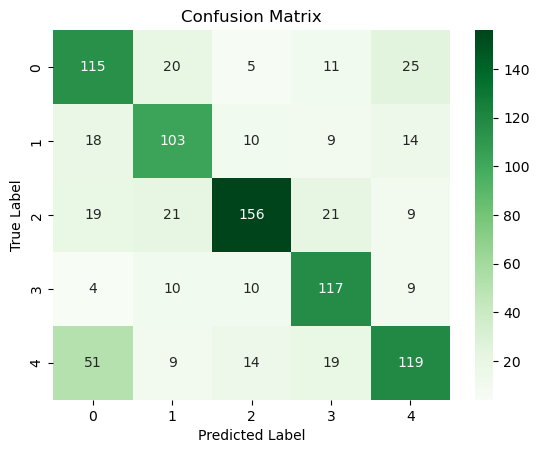

In [67]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')   # What the model predicted
plt.ylabel('True Label')        # The actual correct label
plt.title('Confusion Matrix')
plt.show()

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted_new))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60       176
           1       0.63      0.67      0.65       154
           2       0.80      0.69      0.74       226
           3       0.66      0.78      0.72       150
           4       0.68      0.56      0.61       212

    accuracy                           0.66       918
   macro avg       0.66      0.67      0.66       918
weighted avg       0.67      0.66      0.67       918



### Testing data using custom images

In [69]:
testing_folder = os.path.join(data_dir, 'testing')
list(data_dir.glob('**/testing/*.jpg'))

[WindowsPath('datasets/flower_photos/testing/162362896_99c7d851c8_n.jpg'),
 WindowsPath('datasets/flower_photos/testing/162362897_1d21b70621_m.jpg'),
 WindowsPath('datasets/flower_photos/testing/163978992_8128b49d3e_n.jpg')]

In [70]:
testing=list(data_dir.glob('**/testing/*'))

In [71]:
len(testing)

3

In [72]:
img=PIL.Image.open(testing[0])

In [73]:
testing_data=[]
for images in testing:
    img=cv2.imread(str(images))
    testing_data.append(cv2.resize(img,(180,180)))

In [74]:
testing_data=np.array(testing_data)

In [75]:
testing_data=testing_data/255

In [76]:
testing_data.shape

(3, 180, 180, 3)

In [78]:
predicted=model_cnn_da.predict(testing_data)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


In [79]:
predicted

array([1.0656635e-01, 1.0000000e+00, 3.0549499e-01, 1.3730128e-06,
       1.1682424e-01], dtype=float32)

In [80]:
predicted=tf.nn.softmax(predicted)
np.argmax(predicted)

1